## 背景
在一个斯特鲁普任务中，参与者得到一列文字，每个文字都用一种油墨颜色展示。   
参与者的任务是将文字的打印颜色大声说出来。    
这项任务有两个条件：一致文字条件，和不一致文字条件。   
在一致文字条件中：显示的文字是与它们的打印颜色匹配的颜色词，如“红色”字体的颜色是红色；“蓝色”字体的颜色是蓝色。   
在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”字体的颜色可能是红色，不是紫色；“橙色”字体的颜色可能是黄色，不是橙色。   
在每个情况中，我们将记录说出同等大小的列表中的墨色名称的时间。 每位参与者必须全部完成并记录两种条件下使用的时间。  

## 目的
* 识别实验的组成部分；
* 使用描述统计学描述样本概况；
* 设置假设检验，通过样本做出推理，并根据结果得出结论。

## 调查问题

(1) 我们的自变量是什么？因变量是什么？

* 自变量：显示的文字与它们的打印颜色是否匹配

* 因变量：说出同等大小的列表中的墨色名称的时间

(2) 此任务的适当假设集是什么？

我们要研究在两种不同的匹配条件下，参与者完成测试所需时间是否有显著性差异。我们使用总体的参数$\mu_d$来代表总体的颜色词和打印颜色匹配情况下的用时减去颜色词和打印颜色不匹配情况下的用时的平均值，即其总体差值的平均值，再推测不匹配情况下用时会更多，要验证推测，则设置假设集为：  
H0:不一致文字条件不会影响判断文字颜色时间。（μ-μi=0）    
Ha:不一致文字条件会影响判断文字颜色时间。（μ-μi≠0）  
注：  
μ： 显示的文字与打印颜色一致花费的时间的平均值。  
μi：显示的文字与打印颜色不一致花费的时间的平均值。  
选择配对T检验对提出的假设进行检验。     
因为配对T检验的目的是检验相关或配对观测值之差的均值是否等于目标值，与我们上述显示的文字与打印颜色一致和不一致的条件下平均差值是否等于0的假设相一致，故选择配对T检验。    
   
该实验满足配对T检验的前置条件：    
  1.自变量有两种取值，不同取值对应两组因变量数据，参与者之间相互独立。  
  2.样本来自的两个总体服从正态分布。  

(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [1]:
# 在这里执行你的分析
import numpy as np
import pandas as pd
df = pd.read_csv('stroopdata.csv')
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


### 一致文字条件下
- 均值（中心性测量）：14.051
- 标准差（可变性测量）：3.559

### 不一致文字条件下
- 均值（中心性测量）：22.016
- 标准差（可变性测量）：4.797

(4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

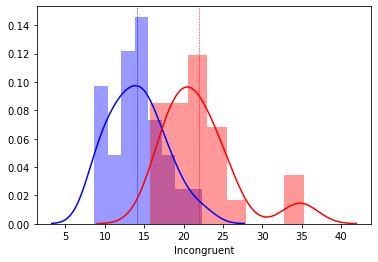

In [2]:
# 创建可视化图表
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.distplot(df['Congruent'],bins=8, color='blue')
plt.axvline(x=df['Congruent'].mean(), linewidth=.5, linestyle='dashed', color='blue')
sns.distplot(df['Incongruent'],bins=8, color='red')
plt.axvline(x=df['Incongruent'].mean(), linewidth=.5, linestyle='dashed', color='red')

从图中看出，一致文字条件数据整体数据分布更靠左（最多的是15s左右），而另一组数据更靠右边（更集中在21或者22左右）。  
这也意味着，一定程度上，显示文字与打印颜色一致时答题者耗时更短些；反之，显示文字与打印颜色不一致时，答题者耗时要更长。

(5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与您的期望一致？

In [3]:
# 计算统计检验
import scipy.stats as st
st.ttest_rel(df['Congruent'],df['Incongruent'])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.103000585711178e-08)

In [4]:
# 计算自由度
n = len(df); 
n - 1

23

附：界值表
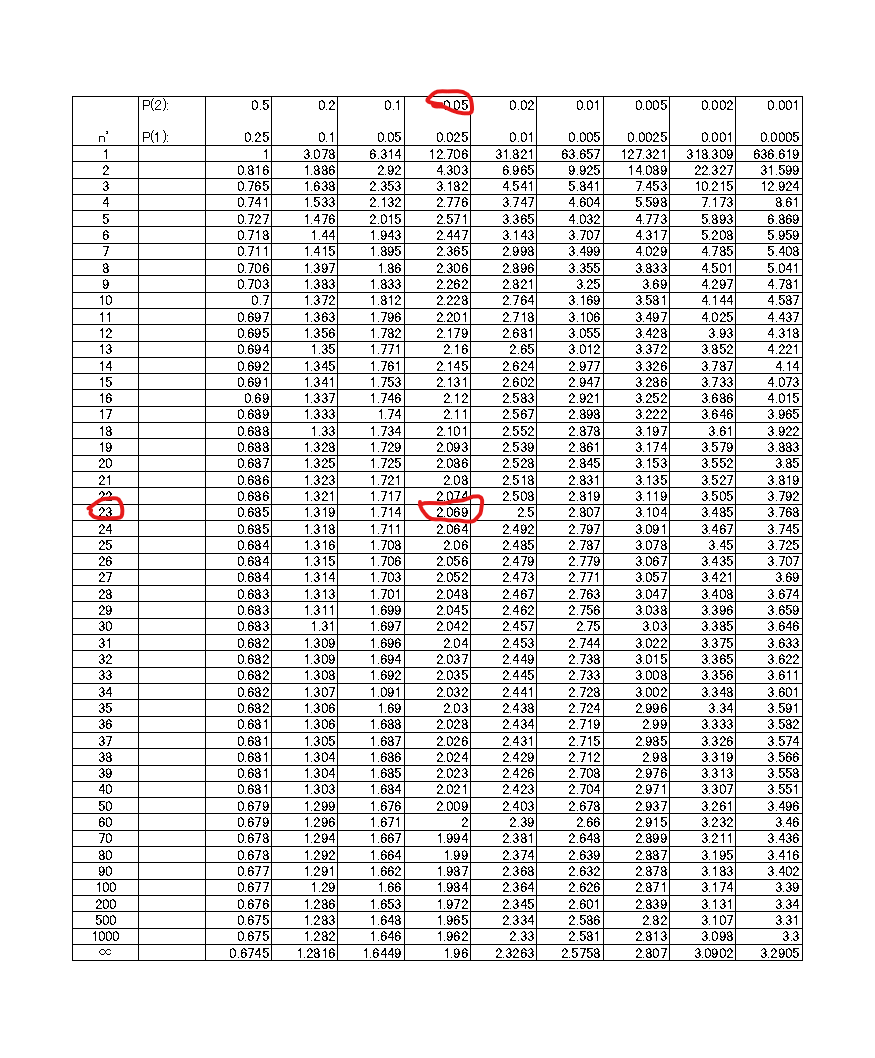

### 结论：
- 当α=0.05显著水准下，进行双侧T检验，临界值为±2.069，实际T统计量为-8.021。
- 因为-8.021<-2.069，所以拒绝零假设，接受备择假设，即：不一致文字条件会影响判断文字颜色时间。